In [1]:
#  cnn + mnist 데이터셋 
# mnist 분류 모델 학습
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [2]:
# 데이터셋 가져오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(
    X_train,
    x_test,
) = X_train / 255.0, X_test / 255.0  # 데이터 정규화


X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

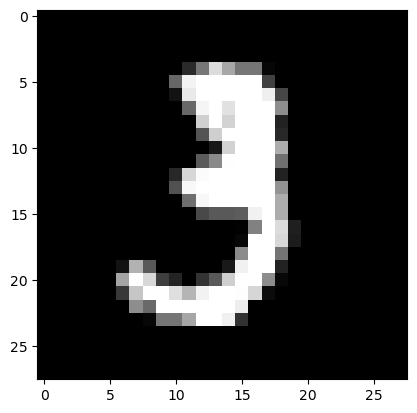

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap='gray')
plt.show()

In [6]:
ds = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(10000)
tf.data.Dataset.from_tensor_slices((X_train,y_train))
# X_train과 y_train이라는 두 개의 텐서를 입력으로 받아 데이터셋 객체를 생성.
# 각 샘플은 (X_train[i], y_train[i]) 형식의 쌍으로 구성.
# 일반적으로 X_train은 입력 데이터(예: 이미지, 텍스트 등), y_train은 해당 데이터에 대한 레이블.
# .shuffle(10000) 데이터셋의 샘플 순서를 무작위로 섞는다.
# 10000은 버퍼 크기를 의미하며, 이 크기만큼 샘플을 메모리에 적재하여 무작위로 섞는다.
# 버퍼 크기가 클수록 무작위성이 높아지지만, 메모리 사용량도 증가한다.


#훈련세트 70퍼 구성 
train_size = int(len(X_train) * 0.7)
train_ds = ds.take(train_size).batch(20)

# ds.take(train_size)
# 데이터셋 ds에서 처음 train_size 개의 샘플을 선택한다.
# 예를 들어, train_size가 1000이면 데이터셋의 첫 1000개의 샘플만 선택한다.
# 이 부분은 학습 데이터셋과 검증 데이터셋 또는 테스트 데이터셋을 분리하는 데 주로 사용된다.


# .batch(20)
# 선택된 데이터셋을 배치 크기 20으로 나눈다.
# 학습할 때 데이터를 20개씩 묶어서 모델에 전달한다.
# 배치 크기는 학습 속도와 메모리 사용량에 영향을 미치는 중요한 하이퍼파라미터이다.

# 검증 세트 나머지 
val_ds = ds.skip(train_size).batch(20)

# train_size 개수만큼 샘플을 건너뛰고 나머지 샘플로 새로운 데이터셋을 만든다.
# 보통 학습 데이터와 검증 데이터를 분리할 때 사용된다.
# 예를 들어, 데이터셋 전체를 train_size와 val_size로 나누고 싶을 때 take()로 학습 데이터를 선택한 후,
# skip()으로 나머지 데이터를 검증용으로 사용한다.



In [7]:
# 합성곱 모델 구성 
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='relu'))# 입력
model.add(Dense(20, activation='relu'))# 은닉
model.add(Dense(10, activation='softmax'))# 출력 

model.summary()


C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 생성 
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# SGD는 간단하고 튜닝에 따라 강력하지만, 수렴 속도가 느릴 수 있다.
# Adam은 자동으로 학습률을 조정하여 더 빠른 수렴을 보장하지만, 과적합 위험이 있을 수 있다.
# 문제에 따라 적합한 옵티마이저를 선택해야 한다.
# SGD는 큰 데이터셋에서 일반화 성능이 좋은 반면, Adam은 빠르게 좋은 성능을 얻고 싶을 때 유용하다.


# adam 특징


# 장점:
# 학습률을 따로 조정하지 않아도 잘 동작한다.
# 빠른 수렴 속도를 보여준다.
# 기울기가 희소한 문제에서도 효과적이다.


# 단점:
# 더 많은 메모리를 사용한다.
# 과적합의 위험이 있을 수 있다


# sgd 특징


# 장점:
# 간단하고 구현이 용이하다.
# 계산이 빠르고 메모리 사용량이 적다.


# 단점:
# 학습률을 신중하게 조정해야 한다.
# 지역 최솟값이나 평탄한 지역에 갇힐 가능성이 있다.
# 수렴 속도가 느릴 수 있다.


In [9]:
# 모델 학습 
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5387 - loss: 1.3984 - val_accuracy: 0.8930 - val_loss: 0.3728
Epoch 2/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9007 - loss: 0.3508 - val_accuracy: 0.9179 - val_loss: 0.2851
Epoch 3/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9198 - loss: 0.2791 - val_accuracy: 0.9272 - val_loss: 0.2524
Epoch 4/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9299 - loss: 0.2430 - val_accuracy: 0.9344 - val_loss: 0.2282
Epoch 5/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9354 - loss: 0.2237 - val_accuracy: 0.9375 - val_loss: 0.2127
Epoch 6/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9410 - loss: 0.2048 - val_accuracy: 0.9405 - val_loss: 0.2074
Epoch 7/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.1936 - val_accuracy: 0.9439 - val_loss: 0.1933
Epoch 8/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9437 - loss: 0.1862 - 

In [10]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 34.8556


[30.711132049560547, 0.939300000667572]

In [11]:
# 모델 추출 및 저장 
model.save('mnist_model.keras')

C:\Users\3호실-09\AppData\Local\Temp\ipykernel_10812\3367701759.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  acc_ax.legend(loc='upper left')


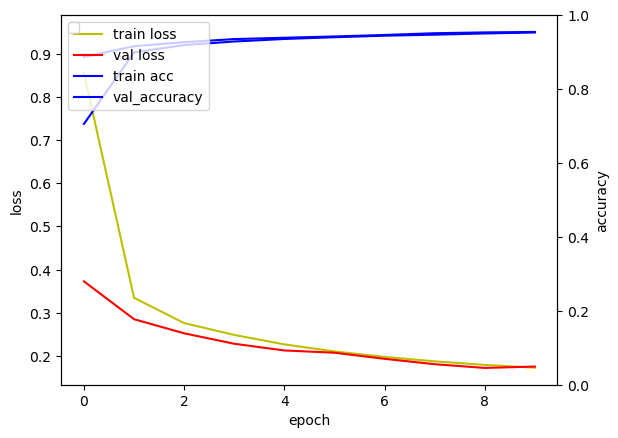

In [12]:
# 학습 결과 시각화 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # 같은 X 축을 공유하면서 y 축을 두개로 설정할 떄 사용 

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.plot(history.history['accuracy'], 'b', label='train acc')
loss_ax.plot(history.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper left')

plt.show()

In [14]:
# 테스트 데이터만 로드 
_, (X_test, y_test) = mnist.load_data()

# 정규화 
X_test = X_test /255.0

print(X_test.shape)

from tensorflow.keras.models import load_model


# 훈련 모델 호출 
model = load_model('mnist_model.keras')
model.evaluate(X_test, y_test)

(10000, 28, 28)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.1958


[0.1721160113811493, 0.9474999904632568]

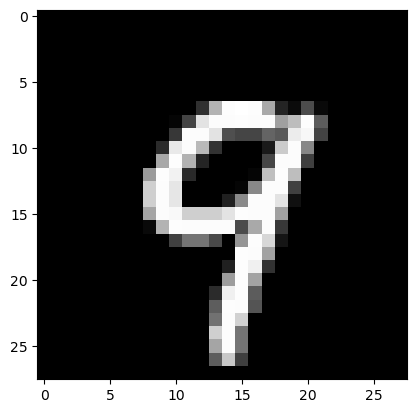

In [18]:
# 테스트용 이미지 하나 선택 
plt.imshow(X_test[12], cmap='gray')
plt.show()

In [19]:
# 테스트 이미지 인식하는지 실제로 예측 

import numpy as np 

picks=[12]

predict = model.predict(X_test[picks])
predicted_classes = np.argmax(predict, axis=1)
print('손글씨 이미지 예측값:', predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
손글씨 이미지 예측값: [9]
